## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



data = pd.read_csv("ha_1.csv")
data = data.dropna()
data.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [22]:
X = data[['age', 'chol']]
y = data['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['age', 'chol']])

model = LogisticRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [-3.24011226]
Coefficients: [[0.04686331 0.00180124]]


In [18]:
beta_0 = model.intercept_[0]
beta_1, beta_2 = model.coef_[0]

age = 55

# for P = 0.5
chol_threshold_50 = -(beta_0 + beta_1 * age) / beta_2
print(f"Cholesterol threshold for P=0.5 (predicting heart disease): {chol_threshold_50}")

# for P = 0.9
P = 0.9
log_odds_90 = np.log(P / (1 - P))
chol_threshold_90 = (log_odds_90 - beta_0 - beta_1 * age) / beta_2
print(f"Cholesterol threshold for P=0.9 (90% chance of heart disease): {chol_threshold_90}")

Cholesterol threshold for P=0.5 (predicting heart disease): 367.87488979860706
Cholesterol threshold for P=0.9 (90% chance of heart disease): 1587.7158792752975


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [20]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

coefficients = lda.coef_[0]
intercept = lda.intercept_[0]

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

age = 55

chol_threshold = -(intercept + coefficients[0] * age) / coefficients[1]
print(f"Cholesterol threshold for age 55: {chol_threshold}")

Coefficients: [0.04655744 0.00178967]
Intercept: -3.2196776604068784
Cholesterol threshold for age 55: 368.235357529938


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [23]:
data['diagnosis'] = data['diagnosis'].map({'No Disease': 0, 'Disease': 1})

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
svc = SVC(kernel='linear', probability=True)
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X, y)

best_svc = grid.best_estimator_

print(f"Optimal C: {grid.best_params_['C']}")

coef = best_svc.coef_[0]
intercept = best_svc.intercept_[0]

print(f"Coefficients: {coef}")
print(f"Intercept: {intercept}")

age = 55

chol_threshold = -(intercept + coef[0] * age) / coef[1]
print(f"Cholesterol threshold for age 55: {chol_threshold}")

Optimal C: 0.1
Coefficients: [0.06439804 0.00366067]
Intercept: -4.686550429743357
Cholesterol threshold for age 55: 312.69049430633044


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

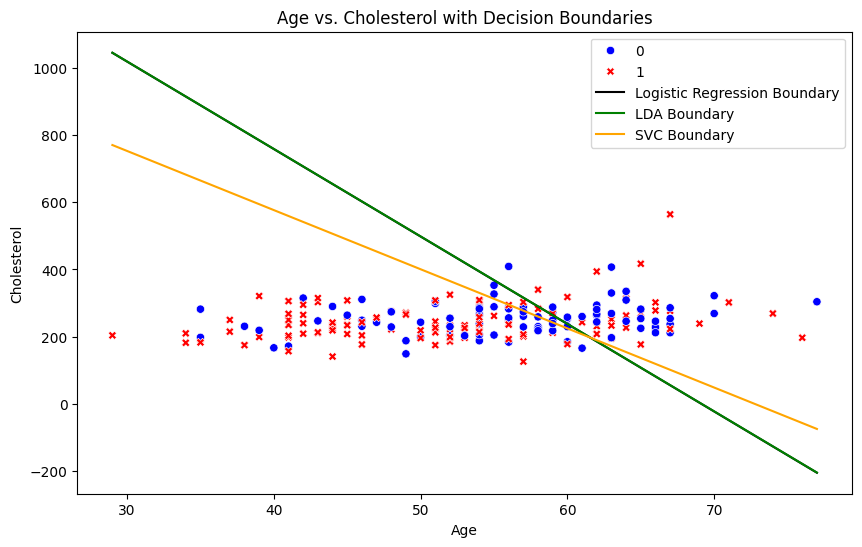

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='chol', hue='diagnosis', palette={0: 'blue', 1: 'red'}, style='diagnosis')

# 1. Logistic Regression
beta_0 = model.intercept_[0]
beta_1, beta_2 = model.coef_[0]
age_vals = np.linspace(data['age'].min(), data['age'].max(), 100)
chol_vals_logreg = -(beta_0 + beta_1 * age_vals) / beta_2
plt.plot(age_vals, chol_vals_logreg, label='Logistic Regression Boundary', color='black')

# 2. LDA
coef_lda = lda.coef_[0]
intercept_lda = lda.intercept_[0]
chol_vals_lda = -(intercept_lda + coef_lda[0] * age_vals) / coef_lda[1]
plt.plot(age_vals, chol_vals_lda, label='LDA Boundary', color='green')

# 3. SVC
coef_svc = best_svc.coef_[0]
intercept_svc = best_svc.intercept_[0]
chol_vals_svc = -(intercept_svc + coef_svc[0] * age_vals) / coef_svc[1]
plt.plot(age_vals, chol_vals_svc, label='SVC Boundary', color='orange')

plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs. Cholesterol with Decision Boundaries')
plt.legend()

plt.show()